Saving Girl.pgm to Girl (1).pgm


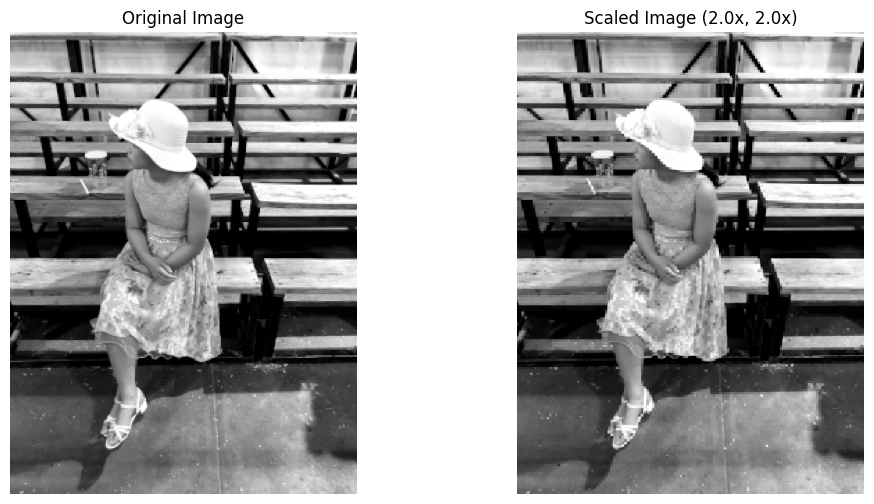

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

# Function for nearest neighbor interpolation
def nearest_neighbor_interpolation(src_image, x, y):
    # Round x and y to the nearest integer to find the nearest neighbor
    nearest_x = int(round(x))
    nearest_y = int(round(y))
    nearest_x = max(0, min(nearest_x, src_image.shape[1] - 1))
    nearest_y = max(0, min(nearest_y, src_image.shape[0] - 1))
    # Return the pixel value from the nearest neighbor
    return src_image[nearest_y, nearest_x]

# Upload an image file
uploaded = files.upload()

# Assuming there's only one image uploaded, get the name of the file
image_filename = next(iter(uploaded))

# Read the image into a numpy array using matplotlib
image = plt.imread(image_filename)

# Check if the image has an alpha channel or if it's grayscale
if image.ndim == 3 and image.shape[2] == 4:
    # Remove the alpha channel
    image = image[..., :3]
elif image.ndim == 2:
    # If grayscale, convert to a 3D array with a single color channel
    image = image[:, :, np.newaxis]

# Scale factors
scale_x = 2.0  # Scale factor in x-direction (horizontal)
scale_y = 2.0  # Scale factor in y-direction (vertical)

# Calculate the new image dimensions
new_height = int(image.shape[0] * scale_y)
new_width = int(image.shape[1] * scale_x)

# Determine the number of color channels
num_channels = image.shape[2] if image.ndim == 3 else 1

# Create an empty image array with the new dimensions
scaled_image = np.zeros((new_height, new_width, num_channels), dtype=image.dtype)

# Perform backward mapping from the scaled image to the original image
for y in range(new_height):
    for x in range(new_width):
        # Compute the corresponding location in the original image
        original_x = x / scale_x
        original_y = y / scale_y
        # Assign the interpolated value to the current location in the scaled image
        scaled_image[y, x] = nearest_neighbor_interpolation(image, original_x, original_y)

# If the image was grayscale and converted to 3D array, convert back to 2D for display
if num_channels == 1:
    scaled_image = scaled_image.squeeze()

# Display the original and the scaled images
plt.figure(figsize=(12, 6))

# Original image
plt.subplot(1, 2, 1)
plt.imshow(image.squeeze(), cmap='gray' if num_channels == 1 else None)
plt.title('Original Image')
plt.axis('off')

# Scaled image
plt.subplot(1, 2, 2)
plt.imshow(scaled_image, cmap='gray' if num_channels == 1 else None)
plt.title(f'Scaled Image ({scale_x}x, {scale_y}x)')
plt.axis('off')

plt.show()
